### Интегралы
1) Запрогать метод численного интегрирования правых (или левхых) прямоугольников
2) Запрогать метод численного интегрировани центральными прямоугольниками
3) Доказать, что метод центральных прямоугольников - это метод второго порядка

Метод левых/правых, центральных, метод симпсона, показать на графиках что они сходятся по разному и соответствуют теории

$$
\int_{0}^{1} e^{x}sh(x^4) \approx 0.498103
$$

In [95]:
import numpy as np

def f(x):
  return np.exp(x)*np.sinh(x**4)

def r_rec(f, l, r, h=1e-3):
  x = np.arange(l, r, h)
  return np.sum( f(x+h) * h )

def c_rec(f, l, r, h=1e-3):
  x = np.arange(l, r, h)
  return np.sum( f(x+h/2) * h )

def simp(f, l, r, h=1e-3):
  x = np.arange(l, r, h)
  return h/6 * np.sum( f(x) + 4 * f(x + h / 2) + f(x + h) ) 

r_rec_res = r_rec(f, 0, 1)
c_rec_res = c_rec(f, 0, 1)
s_res = simp(f, 0, 1)
print(f'Точный ответ: 0.498103')
print(f'Правые прямоугольники: {r_rec_res:.6}')
print(f'Центральные прямоугольники: {c_rec_res:.6}')
print(f'Метод Симпсона: {s_res:.6}')

Точный ответ: 0.498103
Правые прямоугольники: 0.499702
Центральные прямоугольники: 0.498102
Метод Симпсона: 0.498103


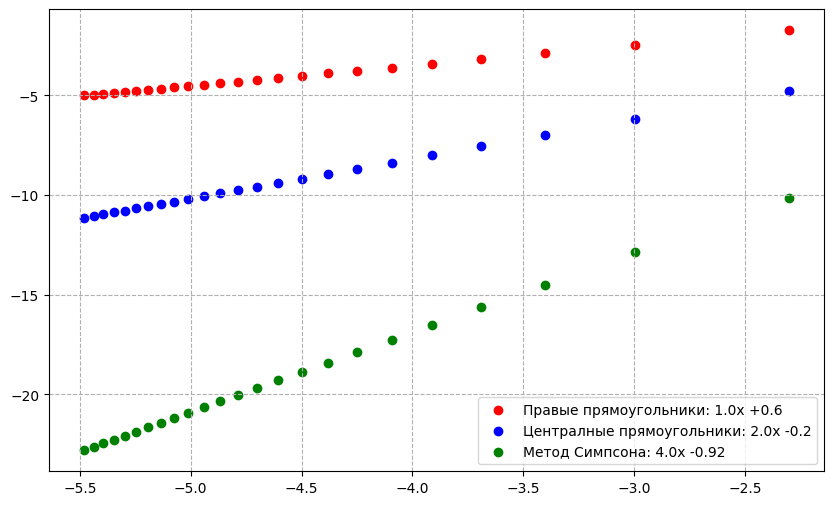

In [94]:
import matplotlib.pyplot as plt

partitions = np.array([i for i in range(10, 250, 10)])
ACTUAL = 0.4981030061105635

r_errors = []; c_erros = []; simp_errors = []
[ r_errors.append(abs(r_rec(f, 0, 1, 1/i) - ACTUAL)) for i in partitions ]
[ c_erros.append(abs(c_rec(f, 0, 1, 1/i) - ACTUAL)) for i in partitions ]
[ simp_errors.append(abs(simp(f, 0, 1, 1/i) - ACTUAL)) for i in partitions ]

a_r, b_r = np.polyfit(-np.log(partitions), np.log(r_errors), 1)
a_c, b_c = np.polyfit(-np.log(partitions), np.log(c_erros), 1)
a_s, b_s = np.polyfit(-np.log(partitions), np.log(simp_errors), 1)

fig, ax = plt.subplots(figsize=(10,6))
ax.grid(which='major', ls='--')
ax.scatter(-np.log(partitions), np.log(r_errors), label=f"Правые прямоугольники: {a_r:.2}x +{b_r:.1}", c='r')
ax.scatter(-np.log(partitions), np.log(c_erros), label=f"Централные прямоугольники: {a_c:.2}x {b_c:.1}", c='b')
ax.scatter(-np.log(partitions), np.log(simp_errors), label=f"Метод Симпсона: {a_s:.2}x {b_s:.2}", c='g')

ax.legend()
plt.show()